<a href="https://colab.research.google.com/github/shifanaannath/LSDM-RNN-GRU/blob/main/Copy_of_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#step 1
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
#step 2:Load and Clean Dataset
df= pd.read_csv("/content/loan_data (2).csv")
df.dropna(inplace=True)


In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
#step 3:Encode Categorical Colums
label_cols = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']

for col in label_cols:
    df[col]=LabelEncoder().fit_transform(df[col])


In [ ]:
#step 4:Prepare Features and Labels
x = df.drop("loan_status", axis=1).values
y = df["loan_status"].values

In [ ]:
#step 5:Normalize Features
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
#step 6:Split Data Into Train/Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:

#step 7:Convert to pyTorch Tensors
X_train=torch.tensor(x_train,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.long)
X_test=torch.tensor(x_test,dtype=torch.float32)
y_test=torch.tensor(y_test,dtype=torch.long)

In [ ]:
#step 8:create Dataloaders
train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test,y_test)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64)

In [ ]:
#step 9:Define the neural Network - Fixed
class LoanClassifier(nn.Module):
  def __init__(self):
    super(LoanClassifier,self).__init__()
    self.net=nn.Sequential(
        nn.Linear(13,64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64,32),
        nn.ReLU(),
        nn.Linear(32,2)
    )

  def forward(self, x):
    return self.net(x)

model=LoanClassifier()

#step 10:Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() ,lr=0.001)

#step 11:Train the model - Fixed
num_epochs = 20
for epoch in range(num_epochs):
  model.train()
  total_loss = 0
  for xb,yb in train_loader:
    optimizer.zero_grad()
    outputs = model(xb)
    loss = criterion(outputs, yb) # Corrected 'output' to 'outputs'
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1, Loss: 0.2927
Epoch 2, Loss: 0.2314
Epoch 3, Loss: 0.2218
Epoch 4, Loss: 0.2171
Epoch 5, Loss: 0.2119
Epoch 6, Loss: 0.2093
Epoch 7, Loss: 0.2073
Epoch 8, Loss: 0.2052
Epoch 9, Loss: 0.2057
Epoch 10, Loss: 0.2007
Epoch 11, Loss: 0.2006
Epoch 12, Loss: 0.1989
Epoch 13, Loss: 0.1983
Epoch 14, Loss: 0.1968
Epoch 15, Loss: 0.1963
Epoch 16, Loss: 0.1946
Epoch 17, Loss: 0.1938
Epoch 18, Loss: 0.1929
Epoch 19, Loss: 0.1933
Epoch 20, Loss: 0.1926


In [ ]:
#step 12:Evaluate the model
model.eval()
preds=[]
y_true=[]
with torch.no_grad():
  for xb,yb in test_loader:
    outputs=model(xb)
    _,predicted=torch.max(outputs,1)
    preds.extend(predicted.tolist())
    y_true.extend(yb.tolist())

print("\nAccuracy:",accuracy_score(y_true,preds))
print("\nClassification Report:\n",classification_report(y_true,preds))



Accuracy: 0.9107777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      6990
           1       0.84      0.74      0.79      2010

    accuracy                           0.91      9000
   macro avg       0.88      0.85      0.87      9000
weighted avg       0.91      0.91      0.91      9000



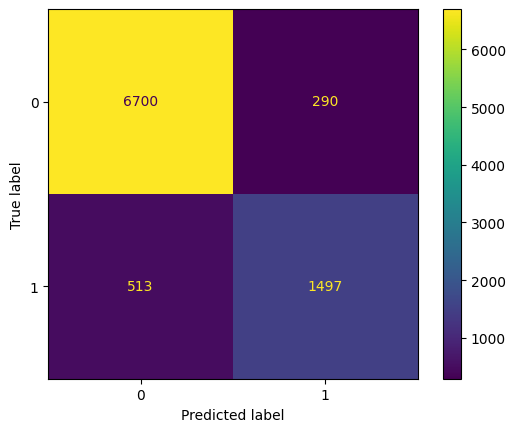

In [ ]:
#step 13:confussion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_true,preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_true))
disp.plot()
plt.show()